<a href="https://colab.research.google.com/github/swathysunder/MSAVI_time_series/blob/main/MSAVI_Time_Series_from_Landsat_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The datasets used in this assignment is directly imported from google earth Engine. Hence, you have to give the authorisation through your gmail in order to run the program. **


In [1]:
#importing and authenticaiton of google earth engine

import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=1M3VNkiBkkBAUbDBbGr0FVc_kcyvtyT0Ls3mAoGx4cA&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g79bgILbHWyzvUjb-IPJwpgJPWeNbO2O7nVuUa0m_htHBS71OCXKSU

Successfully saved authorization token.



Fetching Landsat 8 Image collection & Extracting Region of Interest(ROI)




In [148]:

#import the surface reflectance, 'sr' here
sr= ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")



In [149]:
# Initial date of interest (inclusive).
i_date = '2020-01-01'

# Final date of interest (exclusive).
f_date = '2020-06-30'

# here we will filter only the bands required for MSAVI 2 calculation

sr = sr.select('B4', 'B5','pixel_qa').filterDate(i_date, f_date)


In [150]:
# Define the region of interests (roi). roi_1,2,3 designates the three different study areas here


roi_1 = ee.Geometry.Polygon([[[75.45157492160797,30.634404129904425],\
                            [ 75.4524278640747,30.63372099804389],\
                            [75.45236885547638,30.634399514164798],\
                            [75.45157492160797, 30.634404129904425]\
                            ]])

roi_2 = ee.Geometry.Polygon([[[85.85622847080231,26.09425078918021],\
                              [85.85590660572052,26.093581136401006],\
                              [85.85663080215454,26.09337879451938 ],\
                              [85.85686147212981,26.094009907326967],\
                              [85.85622847080231,26.09425078918021]\
                              ]])

roi_3 = ee.Geometry.Polygon([[[78.66571158170699,17.66869116558751],\
                              [78.6662346124649,17.6686911655875],\
                              [78.6662346124649,17.66929686130703],\
                              [78.66571158170699,17.66929686130703],\
                              [78.66571158170699,17.66869116558751]\
                              ]])


In [170]:
# The buffer zone we consider around each area.
buffer = 1  # meters

# Get the data for the region 1
sr_roi_1 = sr.getRegion(roi_1,buffer).getInfo()
# Get the data for the region 2
sr_roi_2 = sr.getRegion(roi_2,buffer).getInfo()
# Get the data for the region 3
sr_roi_3 = sr.getRegion(roi_3,buffer).getInfo()

# Preview the result.
sr_roi_1[:6]


[['id', 'longitude', 'latitude', 'time', 'B4', 'B5', 'pixel_qa'],
 ['LC08_148039_20200123',
  75.45242472944838,
  30.633732473074286,
  1579757457192,
  567,
  3314,
  322],
 ['LC08_148039_20200208',
  75.45242472944838,
  30.633732473074286,
  1581139852109,
  872,
  2660,
  322],
 ['LC08_148039_20200224',
  75.45242472944838,
  30.633732473074286,
  1582522248530,
  869,
  1877,
  322],
 ['LC08_148039_20200412',
  75.45242472944838,
  30.633732473074286,
  1586669426084,
  3323,
  3994,
  992],
 ['LC08_148039_20200428',
  75.45242472944838,
  30.633732473074286,
  1588051818437,
  2368,
  3240,
  480]]

Function Definition for client side ee.Image.getRegion array to pandas dataframe

In [156]:
import pandas as pd

def ee_array_to_df(arr, list_of_bands):
    """Transforms client-side ee.Image.getRegion array to pandas.DataFrame."""
    df = pd.DataFrame(arr)

    # Rearrange the header.
    headers = df.iloc[0]
    df = pd.DataFrame(df.values[1:], columns=headers)

    # Remove rows without data inside.
    df = df[['longitude', 'latitude', 'time', *list_of_bands]].dropna()

    # Convert the data to numeric values.
    for band in list_of_bands:
        df[band] = pd.to_numeric(df[band], errors='coerce')

    # Convert the time field into a datetime.
    df['datetime'] = pd.to_datetime(df['time'], unit='ms')

    # Keep the columns of interest.
    df = df[['time','datetime',  *list_of_bands]]

    return df

In [171]:
# call the function to convert ee.image.getRegion array to pandas dataframe
sr_roi_1 = ee_array_to_df(sr_roi_1,['B4','B5','pixel_qa'])
sr_roi_2 = ee_array_to_df(sr_roi_2,['B4','B5','pixel_qa'])
sr_roi_3 = ee_array_to_df(sr_roi_3,['B4','B5','pixel_qa'])
# print(sr_roi_1)

0               time                datetime    B4    B5  pixel_qa
0      1579757457192 2020-01-23 05:30:57.192   567  3314       322
1      1581139852109 2020-02-08 05:30:52.109   872  2660       322
2      1582522248530 2020-02-24 05:30:48.530   869  1877       322
3      1586669426084 2020-04-12 05:30:26.084  3323  3994       992
4      1588051818437 2020-04-28 05:30:18.437  2368  3240       480
...              ...                     ...   ...   ...       ...
26595  1586669426084 2020-04-12 05:30:26.084  3362  4043       992
26596  1588051818437 2020-04-28 05:30:18.437  3299  4152       480
26597  1589434213599 2020-05-14 05:30:13.599  1521  1920       480
26598  1590816617393 2020-05-30 05:30:17.393  1425  2858       322
26599  1592199027594 2020-06-15 05:30:27.594  1501  2885       322

[26600 rows x 5 columns]


Function definition to screen the cloudy pixels. 

The quality index(pixel_qa) for the cloudy and cloud shadow pixels are given in the landsat land surface reflectance product code-page 11 (https://prd-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/atoms/files/LSDS-1368_L8_C1-LandSurfaceReflectanceCode-LASRC_ProductGuide-v3.pdf). 

*The pixels whose quality index falls within the cloud/cloud shadow region are eliminated.* 


In [201]:

def del_cloudy_pixels(df):
  cloud_pixel_qa=[352, 368, 416, 432, 480, 864, 880, 928, 944, 992]
  cloud_shadow_qa=[328, 392, 840, 904, 1350]

  rslt_df = df.loc[~df['pixel_qa'].isin(cloud_pixel_qa)&
                        ~df['pixel_qa'].isin(cloud_shadow_qa)]
  return rslt_df


In [200]:
# call the function to eliminate cloudy pixels from dataframe

cf_sr_roi_1 = del_cloudy_pixels(sr_roi_1)
cf_sr_roi_2 = del_cloudy_pixels(sr_roi_2)
cf_sr_roi_3 = del_cloudy_pixels(sr_roi_3)

# print(cf_sr_roi_1)

0               time                datetime    B4    B5  pixel_qa
0      1579757457192 2020-01-23 05:30:57.192   567  3314       322
1      1581139852109 2020-02-08 05:30:52.109   872  2660       322
2      1582522248530 2020-02-24 05:30:48.530   869  1877       322
6      1590816617393 2020-05-30 05:30:17.393  1042  2993       322
7      1592199027594 2020-06-15 05:30:27.594   897  2805       322
...              ...                     ...   ...   ...       ...
26592  1579757457192 2020-01-23 05:30:57.192   736  2619       322
26593  1581139852109 2020-02-08 05:30:52.109  1052  2211       322
26594  1582522248530 2020-02-24 05:30:48.530   978  1737       322
26598  1590816617393 2020-05-30 05:30:17.393  1425  2858       322
26599  1592199027594 2020-06-15 05:30:27.594  1501  2885       322

[16625 rows x 5 columns]


Once the cloudy pixels are eliminated, the MSAVI 2 values are calulated using the following equation.

**MSAVI 2= (2 * NIR + 1 – sqrt ((2 * NIR + 1)^2 – 8 * (NIR - R))) / 2.**

In Landsat 8,

**MSAVI 2= (2 * Band 5 + 1 – sqrt ((2 * Band 5 + 1)^2 – 8 * (Band 5 – Band 4))) / 2.**

In [180]:

import numpy as np


def calc_msavi(band4,band5):
    """Estimates MSAVI-2 index from the band information."""
    MSAVI= (2*band5*0.0001 + 1-np.sqrt((2*band5*0.0001+1)**2 - 8*(band5 - band4)*0.0001))/2 #0.0001 is the scale for each band
    return MSAVI

msavi_roi_1 =calc_msavi(np.asanyarray(cf_sr_roi_1['B4'].apply(float)), np.asanyarray(cf_sr_roi_1['B5'].apply(float)))
msavi_roi_2 =calc_msavi(np.asanyarray(cf_sr_roi_2['B4'].apply(float)), np.asanyarray(cf_sr_roi_2['B5'].apply(float)))
msavi_roi_3 =calc_msavi(np.asanyarray(cf_sr_roi_3['B4'].apply(float)), np.asanyarray(cf_sr_roi_3['B5'].apply(float)))


As the final step, the MSAVI values are plotted for each region in a single figure. 

In [198]:
#import the libraries for plotting
import matplotlib.pyplot as plt
# from scipy import optimize
%matplotlib inline


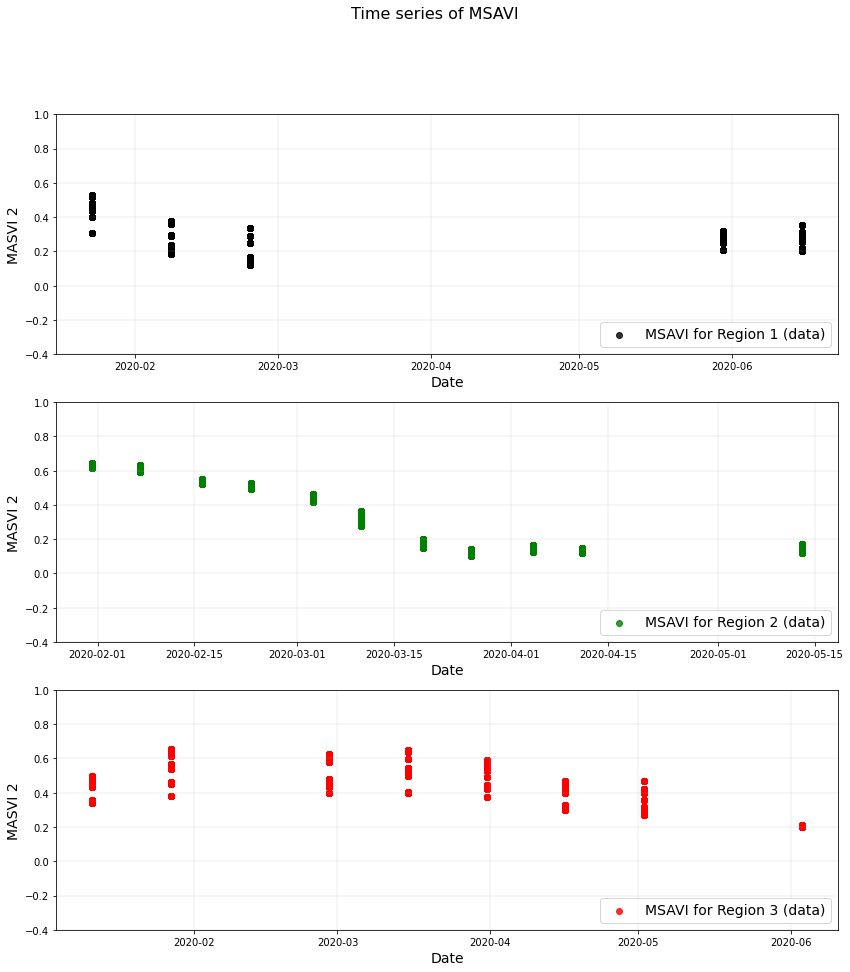

In [199]:

# # Subplots.
fig, ax = plt.subplots(3,figsize=(14,15 ))

# Add scatter plots.
ax[0].scatter(cf_sr_roi_1['datetime'],msavi_roi_1,
           c='black', alpha=0.8, label='MSAVI 2 for Region 1 ')

# Add scatter plots.
ax[1].scatter(cf_sr_roi_2['datetime'],msavi_roi_2,
           c='green', alpha=0.8, label='MSAVI 2 for Region 2 ')
# Add scatter plots.
ax[2].scatter(cf_sr_roi_3['datetime'],msavi_roi_3,
           c='red', alpha=0.8, label='MSAVI 2 for Region 3 ')

# ax.scatter(lst_df_rural['datetime'], lst_df_rural['LST_Day_1km'],
#            c='green', alpha=0.35, label='Rural (data)')


# Add some parameters.
fig.suptitle('Time series of MSAVI', fontsize=16)
#ax.set_title('Time series of MSAVI', fontsize=16)
ax[0].set_xlabel('Date', fontsize=14)
ax[0].set_ylabel('MASVI 2', fontsize=14)
ax[0].set_ylim(-0.4, 1)
ax[0].grid(lw=0.2)
ax[0].legend(fontsize=14, loc='lower right')

ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylabel('MASVI 2', fontsize=14)
ax[1].set_ylim(-0.4, 1)
ax[1].grid(lw=0.2)
ax[1].legend(fontsize=14, loc='lower right')

ax[2].set_xlabel('Date', fontsize=14)
ax[2].set_ylabel('MASVI 2', fontsize=14)
ax[2].set_ylim(-0.4, 1)
ax[2].grid(lw=0.2)
ax[2].legend(fontsize=14, loc='lower right')

plt.show()
